In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme="onedork")
jtplot.style(context='talk', fscale=1.8, spines=False, gridlines='--')
jtplot.style(ticks=True,grid=True,figsize=(4,2))
jtplot.reset()

,call_sum,call_manual,call_IVR,money
call_sum,1.000000,0.939243,0.891435,0.902606
call_manual,0.939243,1.000000,0.681728,0.937787
call_IVR,0.891435,0.681728,1.000000,0.685773
money,0.902606,0.937787,0.685773,1.000000


'-----------------------------------------------------------------------------------'

Text(0.5,0,'callin')

Text(0,0.5,'money')

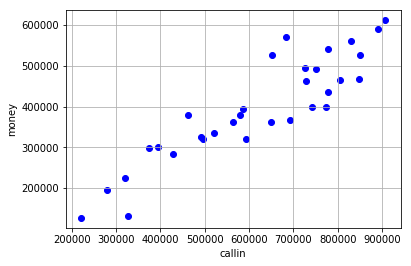

'-----------------------------------------------------------------------------------'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

截距项= 29324.065106765425 
 回归系数= [0.59435126]


'-----------------------------------------------------------------------------------'

Text(0.5,0,'callin')

Text(0,0.5,'money')

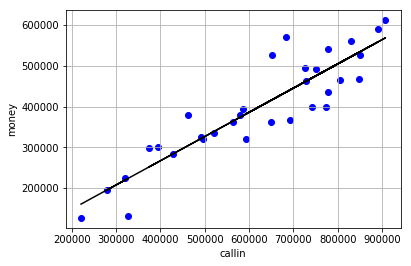

'-----------------------------------------------------------------------------------'

0.8146976630956533

In [4]:
# 1、进线量与电话费关系
# 读入数据集
data_01 = pd.read_excel("E:/Python/【2】Giveu_work/data/callin_money_test.xlsx")

#查看相关系数
rdf_01 = data_01.corr()
rdf_01
'-----------------------------------------------------------------------------------'
# 提取特征x及标签y
X_train = data_01['call_sum']
Y_train = data_01['money']

# 绘制散点图
plt.scatter(X_train,Y_train,color = 'blue')
plt.xlabel('callin')
plt.ylabel('money') 
plt.grid(True)
plt.show()
'-----------------------------------------------------------------------------------'

# 训练集带入模型，得出拟合模型
model_01 = LinearRegression()
X_train = X_train.values.reshape(-1,1)
model_01.fit(X_train,Y_train)

# 计算截距项和系数 y=ax+b
a = model_01.coef_
b = model_01.intercept_
print('截距项=',b,'\n','回归系数=',a)
'-----------------------------------------------------------------------------------'

# 画出训练数据与拟合线
plt.scatter(X_train,Y_train,color = 'blue')
Y_train_pred = model_01.predict(X_train) # 训练数据的预测值
plt.plot(X_train,Y_train_pred,color = 'black') # 绘制拟合线
plt.xlabel('callin')
plt.ylabel('money') 
plt.grid(True)
plt.show()
'-----------------------------------------------------------------------------------'

# 计算R^2
model_01.score(X_train,Y_train)

,callin,contract_sum
callin,1.000000,0.904681
contract_sum,0.904681,1.000000


'-----------------------------------------------------------------------------------'

Text(0.5,0,'contract_sum')

Text(0,0.5,'callin')

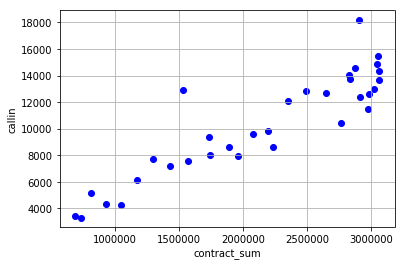

'-----------------------------------------------------------------------------------'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

截距项= 1046.3807962625433 
 回归系数= [0.00431208]


'-----------------------------------------------------------------------------------'

Text(0.5,0,'contract_sum')

Text(0,0.5,'callin')

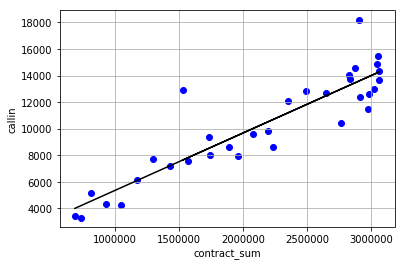

'-----------------------------------------------------------------------------------'

0.8184470884076929

'-----------------------------------------------------------------------------------'

array([6911.35254022, 6449.19677185, 6128.22711775, 5820.06434042,
       5574.43103113, 5428.43694798, 5326.33121225, 5403.3837648 ,
       5638.90093506, 5896.50888973, 6146.55776865, 6408.00778635,
       6684.12749927])

Text(0.5,0,'contract_sum')

Text(0,0.5,'callin')

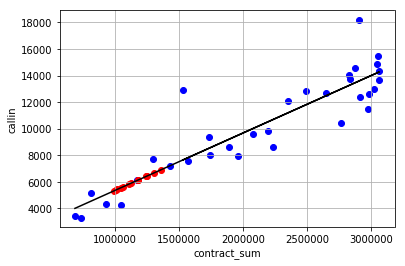

1.0

In [3]:
# 2、现行合同存量与日均进线量关系 
# 读入数据集
data_02 = pd.read_excel("E:/Python/【2】Giveu_work/data/callin_contract_test.xlsx")

# 查看相关系数
rdf_02 = data_02.corr()
rdf_02
'-----------------------------------------------------------------------------------'
# 提取特征x及标签y
x_train = data_02['contract_sum']
y_train = data_02['callin']
# x_train = data_02.ix[0:28,'contract_sum']
# y_train = data_02.ix[0:28,'callin']

# 绘制原始数据散点图
plt.scatter(x_train,y_train,color = 'blue')
plt.xlabel('contract_sum')
plt.ylabel('callin') 
plt.grid(True)
plt.show()
'-----------------------------------------------------------------------------------'

# 训练集带入模型，得出拟合模型
model_02 = LinearRegression()
x_train = x_train.values.reshape(-1,1)
model_02.fit(x_train,y_train)

# 计算最佳截距项和系数
a = model_02.coef_
b = model_02.intercept_
print('截距项=',b,'\n','回归系数=',a)
'-----------------------------------------------------------------------------------'

# 画出训练数据与拟合线
plt.scatter(x_train,y_train,color = 'blue')
y_train_pred = model_02.predict(x_train) # 训练数据的预测值
plt.plot(x_train,y_train_pred,color = 'black') # 绘制最佳拟合线
plt.xlabel('contract_sum')
plt.ylabel('callin') 
plt.grid(True)
plt.show()
'-----------------------------------------------------------------------------------'

# 计算决定系数R^2
model_02.score(x_train,y_train)

'-----------------------------------------------------------------------------------'
# 预测数据集
x_predict = np.array([1360126,1252949,1178514,1107049,1050085,1016228,992549,1010418,1065036,1124777,1182765,1243397,1307431])
x_predict = x_predict.reshape(-1, 1)
y_predict = model_02.predict(x_predict)
y_predict

plt.scatter(x_train,y_train,color = 'blue')
plt.scatter(x_predict,y_predict,color = 'red')
plt.plot(x_train,y_train_pred,color = 'black') # 绘制最佳拟合线
plt.xlabel('contract_sum')
plt.ylabel('callin') 
plt.grid(True)
plt.show()
# 计算决定系数R^2，有多少的y波动可以由回归线来描述
model_02.score(x_predict,y_predict)